# Introduction to Data Visualization <font color='blue'>  </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/1Ks66tyNbHA5GobgiAY_S2ApvKMJmCF57N4cwuXLpjfQ/edit?usp=sharing

# 0) Importing the right tools <font color='blue'> </font>

### <font color='red'>0.1) Import the necessary packages: </font>

- pandas (aliased as pd)
- seaborn (aliased as sns)
- matplotlib.pyplot (aliased as plt)

In [1]:
from __future__ import division

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_collection_cleaning.csv'</i></font>

In [2]:
data = pd.read_csv('../data/data_after_collection_cleaning.csv')

### <font color='red'>0.3) Show a sample of 2 observations from the dataset </font>

In [3]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC
131066,1718,2015-06-06 12:04:00,2015-06-06 12:32:00,375,Mercer St & Bleecker St,40.726795,-73.996951,167,E 39 St & 3 Ave,40.748901,-73.976049,19240,Subscriber,1992,2,30,45,0.03,Mostly Cloudy,16.97
235451,974,2015-06-09 17:10:00,2015-06-09 17:26:00,248,Laight St & Hudson St,40.721854,-74.007718,503,E 20 St & Park Ave,40.738274,-73.987520,17856,Subscriber,1989,1,23,29,0.00,Mostly Cloudy,25.40


# Visualizations

## 1) Plotting bike stations with Basemap <font color='blue'>  </font>

### <font color='red'>1.1) Go on the following websites to understand how Basemap functions </font>

- http://matplotlib.org/basemap/users/geography.html
- http://matplotlib.org/basemap/users/examples.html

### <font color='red'>Run the following block, and understand what the <i>stations</i> object is </font>

In [4]:
stations = (set(zip(data['start station latitude'], 
                    data['start station longitude']))
            .union(set(zip(data['end station latitude'], 
                           data['end station longitude']))))

In [5]:
stations

{(40.680342420000002, -73.955768939999999),
 (40.680983390000002, -73.950047979999994),
 (40.682165640000001, -73.953990259999998),
 (40.682231659999999, -73.961458300000004),
 (40.683124890000002, -73.978951370000004),
 (40.68382604, -73.976323280000003),
 (40.684157480000003, -73.969222729999998),
 (40.684568299999995, -73.958810810000003),
 (40.685144299999997, -73.953809039999996),
 (40.685281719999999, -73.978058129999994),
 (40.685395669999998, -73.974314579999998),
 (40.686500649999999, -73.965633069999996),
 (40.686767930000002, -73.959281680000004),
 (40.686832080000002, -73.979677199999998),
 (40.686918650000003, -73.976681999999997),
 (40.687534059999997, -73.972651830000004),
 (40.687644839999997, -73.969689020000004),
 (40.688070029999999, -73.984106370000006),
 (40.688226, -73.979382000000001),
 (40.688515340000002, -73.964762800000003),
 (40.68864636, -73.982634289999993),
 (40.689004429999997, -73.960238540000006),
 (40.689269420000002, -73.989128669999999),
 (40.689407

### <font color='red'>1.2) Print the total number of stations</font>

In [6]:
print 'Total number of stations: {}'.format(len(stations))

Total number of stations: 326


### <font color='red'>Run the following blocks, that will define the bounds for the Basemap plot</font>

In [7]:
stations_lat = [x[0] for x in stations]
stations_long = [x[1] for x in stations]

In [8]:
b = min(stations_lat)  # bottom
t = max(stations_lat)  # top
l = min(stations_long)  # left
r = max(stations_long)  # right

### <font color='red'>Run the following block, that defines the Basemap Map with the adequate bounds</font>

In [9]:
map_manhattan = Basemap(projection='merc', resolution='h',
             area_thresh=0.1, llcrnrlon=l, llcrnrlat=b,
             urcrnrlon=r, urcrnrlat=t)

### <font color='red'>1.3) Compute the map projection coordinates of stations longitudes and latitudes </font>

In [10]:
x, y = map_manhattan(stations_long, stations_lat)

### <font color='red'>1.4) Draw the map, along with: </font>
- stations longitudes and latitudes (i.e : x and y)
- coastlines
- map boundaries
- fill the continents with the 'coral' color
- Add a title to the map

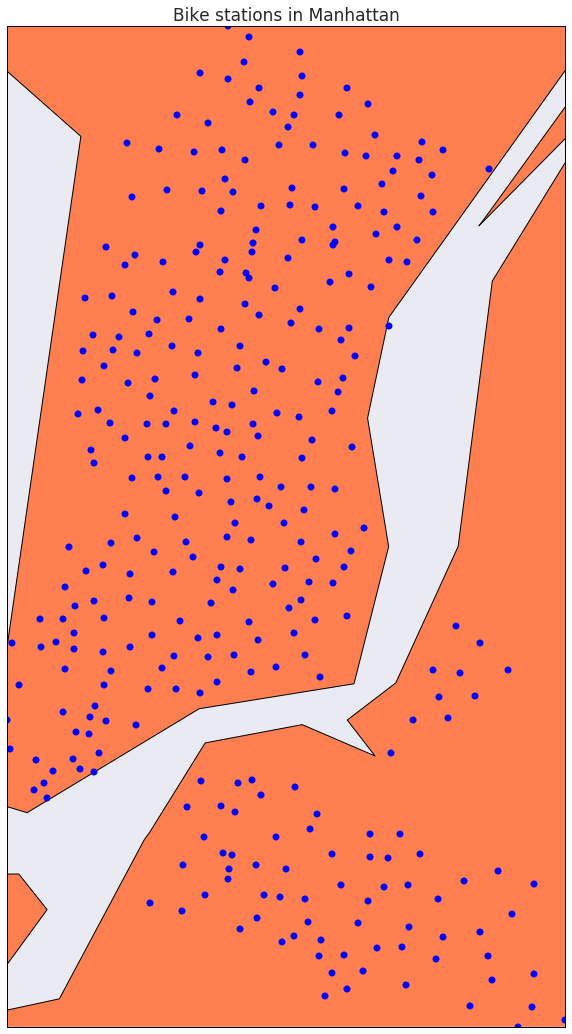

In [11]:
plt.figure(figsize=(10,20))
map_manhattan.plot(x,y,'bo')
map_manhattan.drawcoastlines()
map_manhattan.drawmapboundary()
map_manhattan.fillcontinents(color = 'coral')
plt.title('Bike stations in Manhattan', fontsize=17)
plt.show()

## 2) Plotting with a background image from OpenStreetMap <font color='blue'> </font>

### <font color='red'>2.1) Go to https://www.openstreetmap.org and learn how to download an image of Manhattan:</font>
- Look for Manhattan in the search bar
- Press on the left on export
- Manually select a different area
- Zoom on the part of Manhattan you would like to download
- Click on the right side of the webpage on Share, and manually set the same custom dimensions as before
- Download the image and write down the corners latitudes and longitudes

### <font color='red'>For ease of use, the image that has been uploaded for you on the server. Run the following block that defines the right box bounds:</font>

In [12]:
l,r,b,t = (-74.0173,-73.9584,40.6990,40.7708)  # Left, right, bottom, top

### <font color='red'>2.2) Read the uploaded image using the <i>imread()</i> function of <i>matplotlib.pyplot</i> (which has been aliased as plt)</font>

In [13]:
im = plt.imread('../images/map.png')

### <font color='red'>2.3) Plot the stations on the image background, using the following:</font>
- plt.imshow() with the <i>extent=[l,r,b,t]</i> attribute
- plt.plot() on stations_long and stations_lat lists
- Add a title for the plot, as well as labels for x and y axes
- <b>Warning</b> : do not use <i>x</i> and <i>y</i> computed above any more, since they were the projections on the Basemap image in the previous section, and are not of any use here any more. Here, only <i>stations_long</i> and <i>stations_lat</i> need to be used.

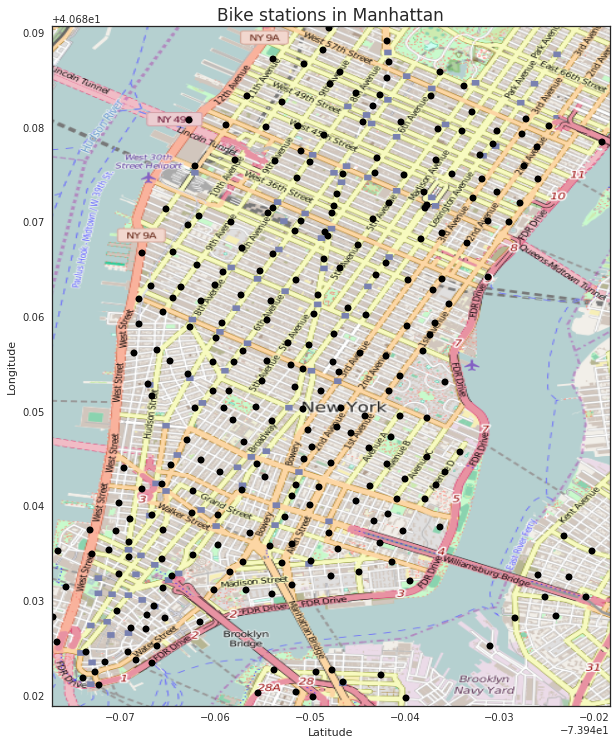

In [14]:
sns.set_style("white")  # Sets a white background 

plt.figure(figsize=(10,15))
plt.plot(stations_long,stations_lat,'ko')
plt.imshow(im, extent=[l,r,b,t])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike stations in Manhattan', size=17)
plt.show()

### Going further
- C3.js and D3.js : http://d3js.org/ and http://c3js.org/
- Meteor : https://www.meteor.com/ used for DIL Telematics Dashboards as follows
- Angular : https://angularjs.org

### <font color='red'>Run the following block, that shows you how Meteor does the work in the Telematics Exchange project within the Data Innovation Lab</font>

In [ ]:
dashboards = plt.imread('../images/dashboard.png')  # Importing dashboards images

plt.figure(figsize=(20,20))
plt.imshow(dashboards)
plt.show()

## 3) Plotting features distributions with seaborn package <font color='blue'> </font>

### <font color='red'>Refer to the following pages to understand how you can leverage the <i>seaborn</i> package to understand your data:</font>

- http://stanford.edu/~mwaskom/software/seaborn/examples/distplot_options.html
- http://stanford.edu/~mwaskom/software/seaborn/examples/

### <font color='red'>3.1) Plot the distribution of trip durations (in minutes) using <i>sns.distplot</i></font>

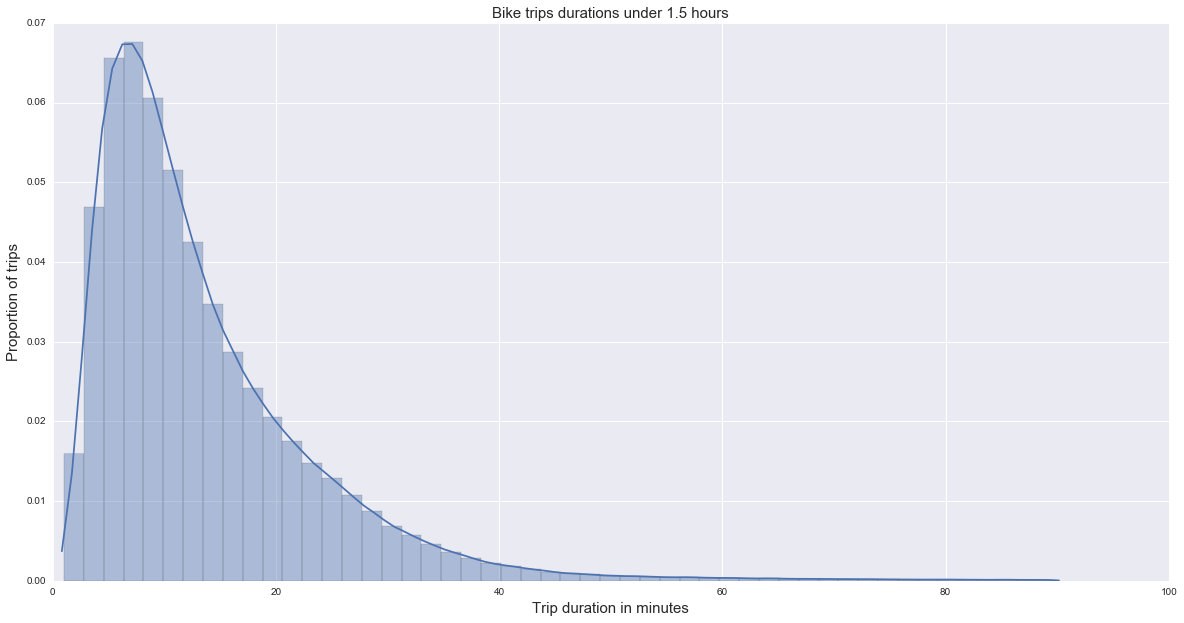

In [16]:
sns.set_style("darkgrid")  # This uses the dark style of seaborn for better understanding

plt.figure(figsize=(20,10))
sns.distplot(data.tripduration/60)
plt.xlabel('Trip duration in minutes',fontsize=15)  # Increase fontsize
plt.ylabel('Proportion of trips',fontsize=15)
plt.title('Bike trips durations under 1.5 hours',fontsize=15)

### <font color='red'>3.2) Filter out data for which gender is unknown (i.e gender=0) and birth year is before 1935</font>

In [17]:
filtering_condition = (data['gender']!=0) & (data['birth year'] > 1935)
truncated_data = data[filtering_condition]

### <font color='red'>3.3) Plot the distribution of bikes riders subscribers ages</font>

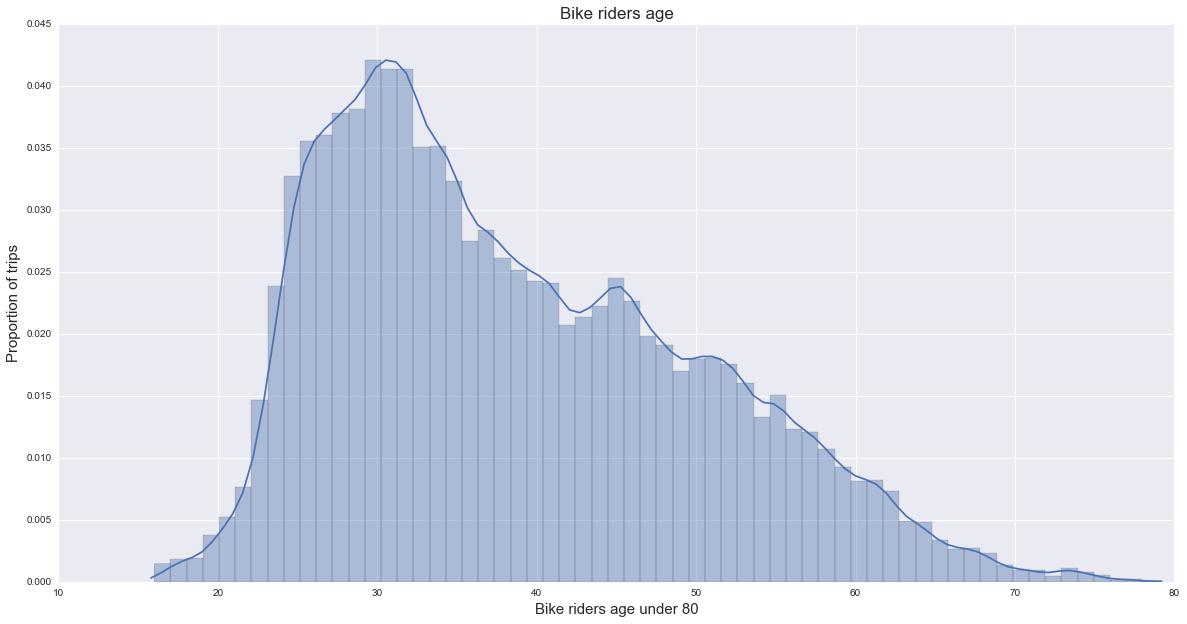

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(2015 - truncated_data['birth year'], bins=62)
plt.xlabel('Bike riders age under 80',fontsize=15)
plt.ylabel('Proportion of trips',fontsize=15)
plt.title('Bike riders age',fontsize=17)

### <font color='red'>3.4) Use <i>sns.countplot</i> to understand the repartition of genders and usertypes</font>

/Users/nathanielbern/anaconda/envs/DSTraining/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


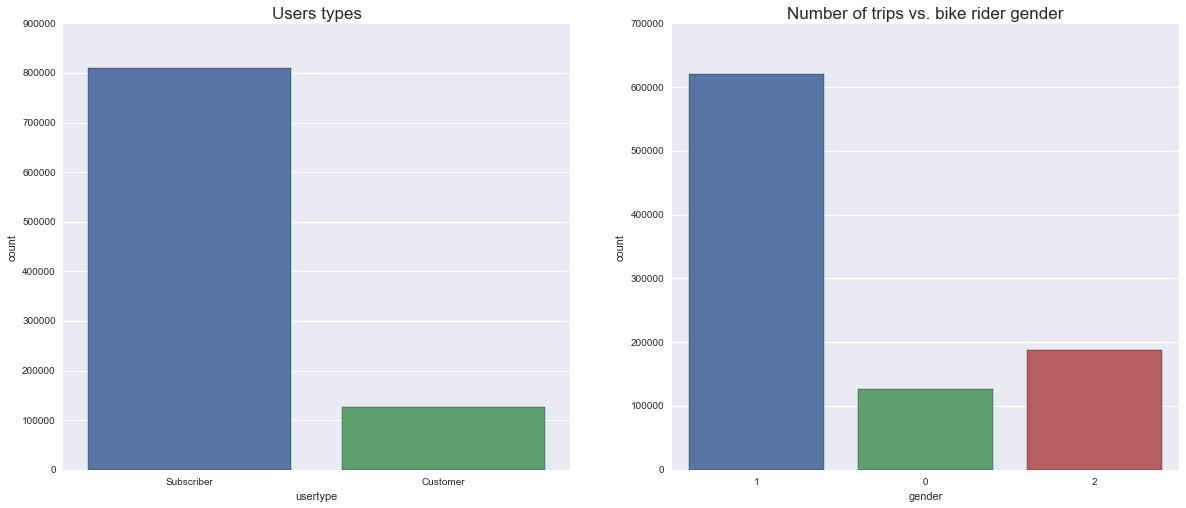

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
sns.countplot(data.usertype)
plt.title('Users types', fontsize=17)

plt.subplot(1, 2, 2)
sns.countplot(data.gender)
plt.title('Number of trips vs. bike rider gender', fontsize=17)
plt.show()

## Matplotlib piecharts

### <font color='red'>Run the following blocks, that group by data with respect to gender</font>

In [20]:
groupby_gender = data.groupby(['gender']).count()

In [21]:
groupby_gender

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,total_docks_start,total_docks_end,Precipitationmm,Conditions,TemperatureC
gender,,,,,,,,,,,,,,,,,,,
0,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668,126668
1,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727,620727
2,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240,188240


### <font color='red'>3.5) Use <i>plt.pie</i> with the <i>labels</i> and <i>explode</i> attributes to plot differently the number of males, females, and unknown genders</font>

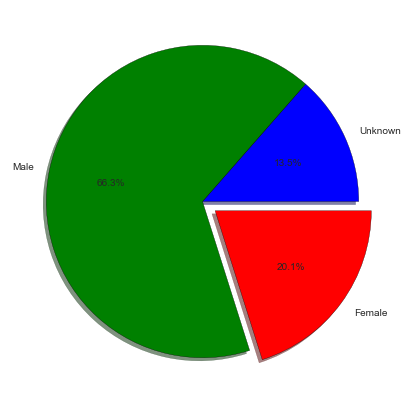

In [22]:
explode = (0, 0, 0.1)
labels = ['Unknown','Male','Female']

plt.figure(figsize=(7,7))
plt.pie(groupby_gender['tripduration'], labels = labels, explode = explode, autopct='%1.1f%%', shadow = True)
plt.show()

### <font color='red'>3.6) Use <i>sns.countplot</i> to plot number of trips vs. weather conditions for <i>truncated_data</i></font>

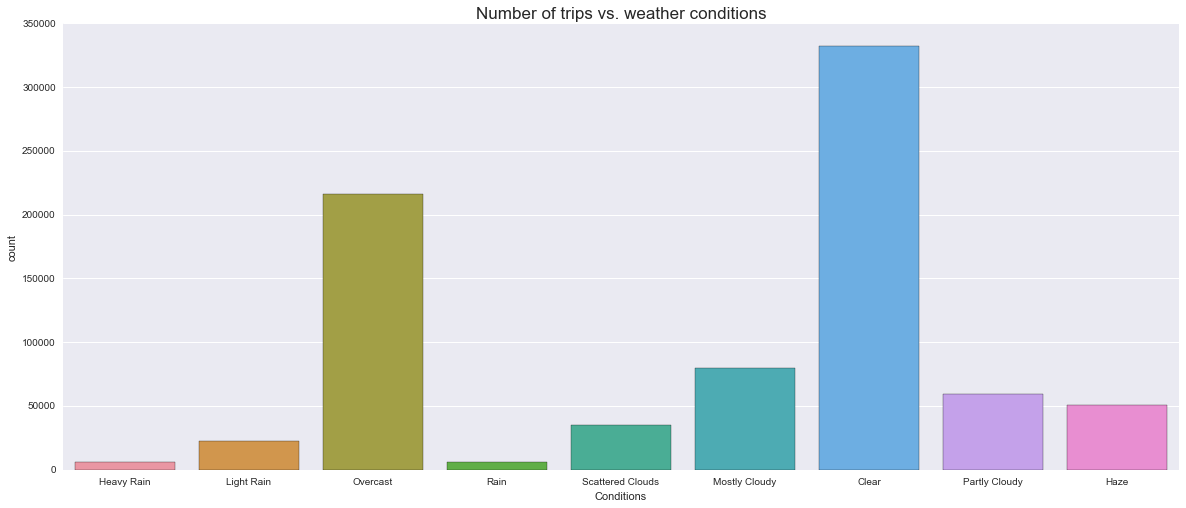

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(truncated_data.Conditions)
plt.title('Number of trips vs. weather conditions', fontsize=17)
plt.show()

## 4) Build a graph with the <i>networkx</i> package <font color='blue'>  </font>

- NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks
- Package tutorial can be found on http://networkx.readthedocs.io/en/networkx-1.11/tutorial/
- It can be used in the case of NYC Bikes Dataset : stations will be the nodes, and trips from station to station will be directed edges

### <font color='red'>4.1) Import the <i>networkx</i> package and alias it as <i>nx</i></font>

In [26]:
import networkx as nx

### <font color='red'>4.2) Create a new directed graph with the <i>DiGraph()</i> function of the <i>nx</i> module</font>

In [27]:
graph_stations = nx.DiGraph()

##### Add directed links from station to station

### <font color='red'>4.3) Run the following block and understand what the <i>stations_indexes</i> and stations_links objects are</font>

In [28]:
stations_indexes = data.groupby(['start station id', 'end station id']).groups

In [32]:
stations_links = {(k[0],k[1],len(v)) for k,v in stations_indexes.iteritems()}

In [33]:
stations_indexes.items()[:10]

[((266, 351), [220839]),
 ((485, 297), [90219, 360846, 502067, 916659, 926134]),
 ((471, 266), [327640, 837732]),
 ((533, 507),
  [26348,
   119955,
   235395,
   311790,
   326942,
   438407,
   498048,
   549424,
   657299,
   664112,
   683357,
   684854,
   700409,
   727692,
   729853,
   738238,
   770225,
   926538]),
 ((312, 241), [134070, 824856]),
 ((351, 304),
  [19330,
   75800,
   108062,
   108064,
   136177,
   136194,
   161782,
   196706,
   304419,
   339808,
   356129,
   572120,
   602081,
   686696,
   816924,
   816935,
   823921,
   823927,
   915155,
   917321,
   917442,
   921123]),
 ((464, 476),
  [55929,
   94523,
   119003,
   144101,
   320262,
   334576,
   369638,
   402794,
   402825,
   514205,
   514306,
   541056,
   544018,
   580069,
   776543,
   930670]),
 ((427, 224),
  [134519,
   134522,
   143684,
   157421,
   157428,
   370484,
   370487,
   468610,
   468687,
   468688,
   498915,
   498916,
   507762,
   569951,
   569952,
   569965,
   5

### <font color='red'>4.3) Use the <i>add_weighted_edges_from()</i> function of any networkx Directed Graph to build the directed links from station to station</font>

In [40]:
graph_stations.add_weighted_edges_from(stations_links)

##### Analyze graph

### <font color='red'>4.4) Analyze the graph using the following functions on the graph:</font>
- nodes()
- edges()
- in_degree()
- nodes_with_selfloops()

In [41]:
graph_stations.nodes()[:5]

[512, 513, 514, 515, 516]

In [42]:
graph_stations.in_degree(513)

198

In [43]:
graph_stations.edges()[:5]

[(512, 512), (512, 513), (512, 514), (512, 515), (512, 517)]

In [44]:
print 'Number of self-looping stations : {}'.format(len(graph_stations.nodes_with_selfloops()))

Number of self-looping stations : 324


### <font color='red'>4.4) Run the following block. What does it show ?</font>

In [45]:
sorted(graph_stations.edges(data=True), key = lambda x: x[2]['weight'], reverse=True)[:10]

[(2006, 2006, {'weight': 1940}),
 (281, 281, {'weight': 712}),
 (499, 499, {'weight': 623}),
 (387, 387, {'weight': 540}),
 (514, 426, {'weight': 453}),
 (519, 492, {'weight': 437}),
 (435, 509, {'weight': 430}),
 (281, 499, {'weight': 430}),
 (426, 426, {'weight': 382}),
 (363, 327, {'weight': 381})]

### <font color='red'>4.5) Print the id of the graph-centric station using <i>nx.degree_centrality()</i></font>

In [46]:
print 'Central station is station {}'.format(max(nx.degree_centrality(graph_stations)))

Central station is station 3002


### <font color='red'>4.6) Plot the graph using the <i>draw_networkx</i> function of the module. You can use the following attributes for clarity:</font>
- arrows=False
- pos = nx.spring_layout(graph_stations)
- width=0.1

<b>Note</b>: You will get different plots for different executions, as initial positions within the graph are random.

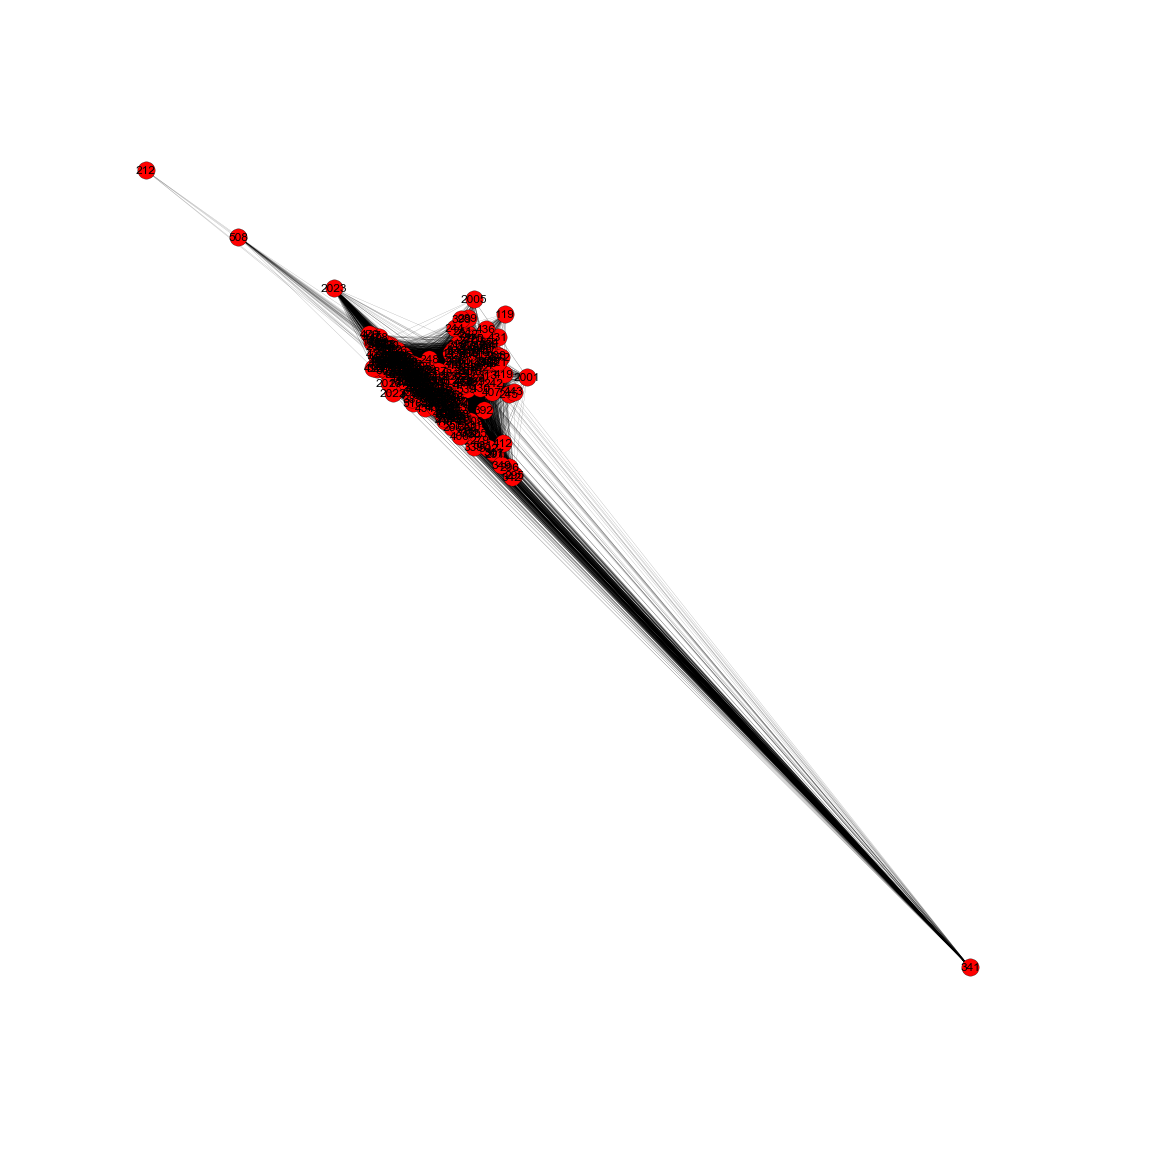

In [47]:
plt.figure(figsize=(20,20))
nx.draw_networkx(graph_stations, arrows=False,
                 pos=nx.spring_layout(graph_stations), width=0.1)
plt.axis('off')
plt.show()

#### *Plot most common self-looping stations*

In [48]:
self_looping_stations = sorted(graph_stations.selfloop_edges(data=True),
                               key = lambda x : x[2]['weight'], reverse=True)[:10]

In [49]:
self_looping_stations

[(2006, 2006, {'weight': 1940}),
 (281, 281, {'weight': 712}),
 (499, 499, {'weight': 623}),
 (387, 387, {'weight': 540}),
 (426, 426, {'weight': 382}),
 (457, 457, {'weight': 346}),
 (514, 514, {'weight': 275}),
 (3002, 3002, {'weight': 245}),
 (217, 217, {'weight': 187}),
 (327, 327, {'weight': 187})]

### <font color='red'>4.7) Create a Directed Graph containing only the self-looping stations</font>

In [50]:
self_looping_stations_graph = nx.DiGraph(self_looping_stations)

### <font color='red'>Run the following blocks, they define the self-looping stations latitudes and longitudes and add them to two lists</font>

In [51]:
self_looping_stations_ids = self_looping_stations_graph.nodes()

In [52]:
self_looping_stations_long = \
[data[data['start station id']==id].iloc[0]['start station longitude'] for id in self_looping_stations_ids]

self_looping_stations_lat = \
[data[data['start station id']==id].iloc[0]['start station latitude'] for id in self_looping_stations_ids]

### <font color='red'>4.8) Plot the self looping stations on the Manhattan background as you did in the first part of the hands-on session:</font>

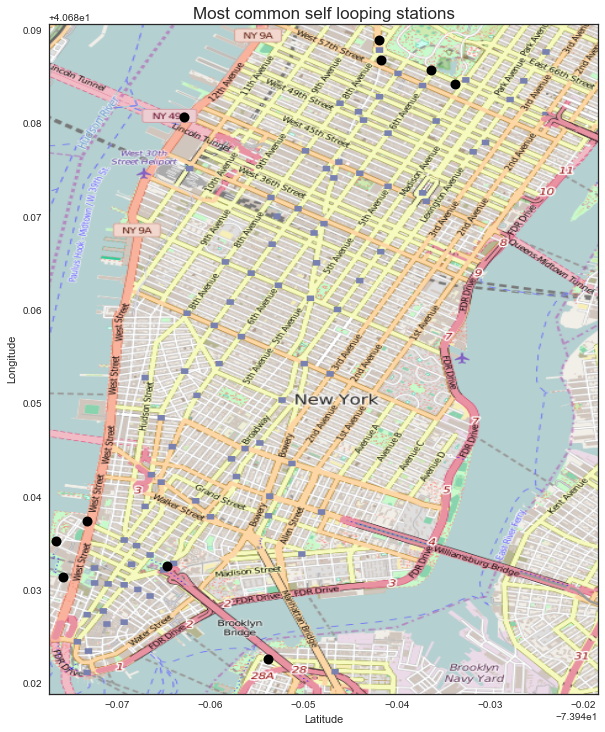

In [53]:
l,r,b,t = (-74.0173,-73.9584,40.6990,40.7708)
im = plt.imread('../images/map.png')
sns.set_style('white')

plt.figure(figsize=(12,12))
plt.plot(self_looping_stations_long, self_looping_stations_lat,'ko', markersize=10)
plt.imshow(im, extent=[l,r,b,t])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Most common self looping stations', size=17)
plt.show()

##### Draw most common directed trips

### <font color='red'>Run the following block, that keeps the most common trips:</font>

In [54]:
common_trips = sorted([(u,v,d) for (u,v,d) in graph_stations.edges(data=True) if u!=v],
                              key = lambda x : x[2]['weight'], reverse=True)[:5]

### <font color='red'>4.9) Understand the structure of <i>common_trips</i>, and build a directed graph from these trips:</font>

In [55]:
common_trips

[(514, 426, {'weight': 453}),
 (519, 492, {'weight': 437}),
 (435, 509, {'weight': 430}),
 (281, 499, {'weight': 430}),
 (363, 327, {'weight': 381})]

In [56]:
common_trips_graph = nx.DiGraph(common_trips)

### <font color='red'>4.10) Plot the graph of the most common trips:</font>

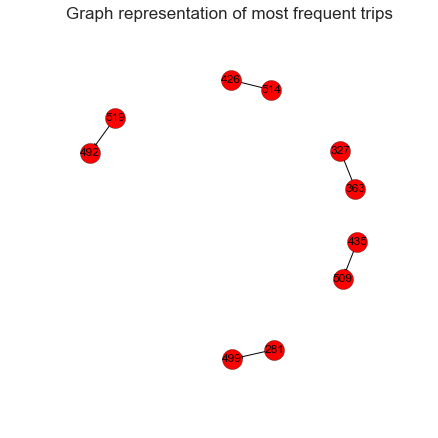

In [57]:
plt.figure(figsize=(7,7))
# Draw graph
nx.draw_networkx(common_trips_graph,
                 pos=nx.spring_layout(common_trips_graph, k=1,iterations=50), node_size=400)
plt.axis('off')
plt.title('Graph representation of most frequent trips', size=17)
plt.show()

##### Plot these common trips

### <font color='red'>4.11) Run the following block, understand what it does, as well as the structure of <i>coordinates_common_trips</i>:</font>

In [58]:
common_trips_ids = common_trips_graph.nodes()
coordinates_common_trips = {}

for id_station in common_trips_ids:
    station = data[data['start station id']==id_station].iloc[0]
    coordinates_common_trips.update({
                                    id_station: (station['start station longitude'],
                                         station['start station latitude'])
                                    }
                                    )

In [59]:
coordinates_common_trips

{281: (-73.973714650000005, 40.764397100000004),
 327: (-74.016583539999999, 40.715337899999994),
 363: (-74.01713445, 40.708346980000002),
 426: (-74.013220689999997, 40.71754834),
 435: (-73.994155559999996, 40.741739690000003),
 492: (-73.990930849999998, 40.750199950000003),
 499: (-73.981918410000006, 40.769155050000002),
 509: (-74.001971389999994, 40.745497299999997),
 514: (-74.002776679999997, 40.76087502),
 519: (-73.977706000000012, 40.751872999999996)}

### <font color='red'>4.12) Plot the different start and end coordinates of the most frequent trips on the background image of Manhattan. Add arrows showing the directions of the trips. You might use the following functions:</font>
- plt.plot()
- plt.annotate('', xy=..., xytext=..., arrowprops=...)
- plt.imshow()

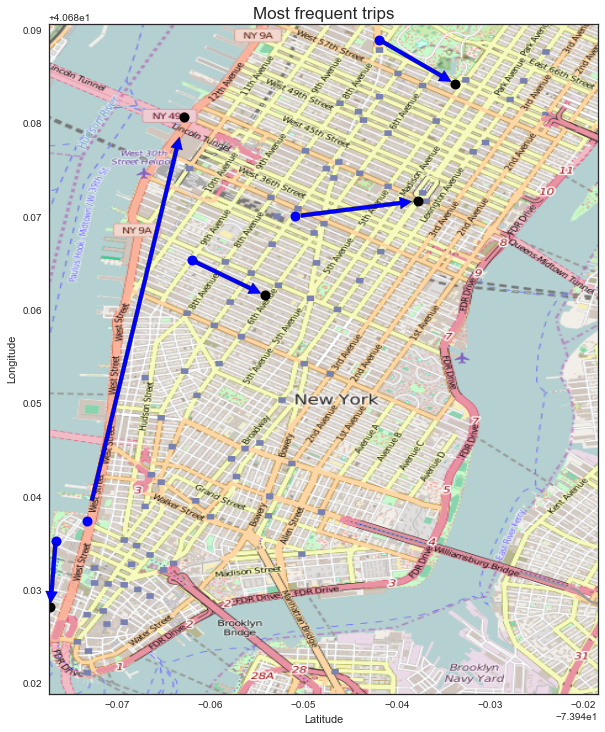

In [60]:
plt.figure(figsize=(12,12))
sns.set_style('white')

for (start,end,weight) in common_trips:
    plt.plot(coordinates_common_trips[start][0],coordinates_common_trips[start][1],'ko', markersize=10)
    plt.plot(coordinates_common_trips[end][0],coordinates_common_trips[end][1],'bo', markersize=10)
    plt.annotate('',
    xy=(coordinates_common_trips[start][0], coordinates_common_trips[start][1]),
    xytext=(coordinates_common_trips[end][0], coordinates_common_trips[end][1]),
    arrowprops=dict(facecolor='blue', shrink = 0.05))

    plt.imshow(im, extent=[l,r,b,t])
plt.title('Most frequent trips', size=17)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

## 5) Build interactive maps with Leaflet <font color='blue'>  </font>

Refer to the following webpage for more information:
- http://folium.readthedocs.org/en/latest/

### <font color='red'>5.1) Import the <i>folium</i> package</font>

In [61]:
import folium

### <font color='red'>5.2) Create a new map using the <i>.Map()</i> function, located around a given station latitude and longitude:</font>

In [62]:
map_osm = folium.Map(location=[40.724561, -73.995653], zoom_start=12)

### <font color='red'>5.3) Run the following block, and study the structure of the <i>stations</i> object:</font>

In [63]:
stations = set(zip(data['start station latitude'],
                   data['start station longitude'],
                   data['start station name'],
                  data['total_docks_start']))\
            .union(set(zip(data['end station latitude'],
                           data['end station longitude'],
                           data['end station name'],
                          data['total_docks_end'])))

In [64]:
stations

{(40.680342420000002, -73.955768939999999, 'Lefferts Pl & Franklin Ave', 25.0),
 (40.680983390000002, -73.950047979999994, 'Macon St & Nostrand Ave', 24.0),
 (40.682165640000001, -73.953990259999998, 'Hancock St & Bedford Ave', 27.0),
 (40.682231659999999, -73.961458300000004, 'Fulton St & Grand Ave', 31.0),
 (40.683124890000002, -73.978951370000004, 'Dean St & 4 Ave', 34.0),
 (40.68382604, -73.976323280000003, 'Atlantic Ave & Fort Greene Pl', 62.0),
 (40.684157480000003, -73.969222729999998, 'Fulton St & Clermont Ave', 27.0),
 (40.684568299999995, -73.958810810000003, 'Monroe St & Classon Ave', 19.0),
 (40.685144299999997, -73.953809039999996, 'Monroe St & Bedford Ave', 23.0),
 (40.685281719999999, -73.978058129999994, 'Ashland Pl & Hanson Pl', 31.0),
 (40.685395669999998, -73.974314579999998, 'S Portland Ave & Hanson Pl', 27.0),
 (40.686500649999999,
  -73.965633069999996,
  'Washington Ave & Greene Ave',
  19.0),
 (40.686767930000002,
  -73.959281680000004,
  'Lexington Ave & Classo

### <font color='red'>5.4) Add markers to the map using the <i>map_osm.simple_marker()</i> function. You can use the following attributes:</font>
- clustered_marker=True (this will clusterize the markers in a pretty way)
- popup= ... (this will put text when you click on a specific marker. Add for instance the name of the station, and the total number of docks)

In [65]:
for latitude, longitude, station_name, total_docks in stations:
    map_osm.simple_marker([latitude, longitude], clustered_marker=True,
                          popup = '<b>{}</b> <br>{:d} docks'.format(station_name,int(total_docks)))

### <font color='red'>Display the map using the <i>display</i> function on the map_osm object. This should show the stations interactively !</font>

In [66]:
display(map_osm)

# Other nice visualizations

- http://www.newyorker.com/news/news-desk/interactive-a-month-of-citi-bike
- http://bikes.oobrien.com/newyork/#zoom=14&lon=-74.0045&lat=40.7319
- https://vimeo.com/89305412
- http://www.r-bloggers.com/new-yorkers-municipal-bikes-and-the-weather/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+RBloggers+%28R+bloggers%29